# Water quality (Machine Learning)

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from numpy import isnan
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


In [2]:
data=pd.read_csv(r'C:\Sudhir\DP\DP 3\final_1.csv')

In [3]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,31.6,6.5,33.6,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,NAN,7.9,7.2,738,2.7,0.518,5000,202,2003
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29,7.5,6.3,585,2.6,0.155,7000,315,2003
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28,7.6,6.2,98,1.2,NAN,9500,570,2003
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28,7.7,6.5,91,1.3,NAN,3050,562,2003


In [4]:
data.dtypes

STATION CODE                         int64
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (mhos/cm)              object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [5]:
# Changing the datatypes to numeric
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['CONDUCTIVITY (mhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (mhos/cm)'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(data['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [6]:
data.dtypes

STATION CODE                          int64
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (mhos/cm)              float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [7]:
start=1
end=1990
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [8]:
data = data.drop([0,1])

In [9]:
data = data.fillna(data.mean())
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.7,0.100000,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.8,0.500000,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.9,0.400000,3428.0,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.000000,5.5,7.4,81.0,1.5,0.100000,2853.0,4049.0,2014
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.200000,6.1,6.7,308.0,1.4,0.300000,3355.0,5672.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,26.205607,7.9,7.2,738.0,2.7,0.518000,5000.0,202.0,2003
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.000000,7.5,6.3,585.0,2.6,0.155000,7000.0,315.0,2003
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.000000,7.6,6.2,98.0,1.2,1.622898,9500.0,570.0,2003
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.000000,7.7,6.5,91.0,1.3,1.622898,3050.0,562.0,2003


In [10]:

columns = ['STATION CODE','LOCATIONS','STATE','Temp','D.O. (mg/l)','PH','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean']

In [11]:
data = data.drop(['Temp','FECAL COLIFORM (MPN/100ml)'],axis = 1)
data

,STATION CODE,LOCATIONS,STATE,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400000,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100000,4049.0,2014
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.300000,5672.0,2014
...,...,...,...,...,...,...,...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.7,0.518000,202.0,2003
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.6,0.155000,315.0,2003
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.2,1.622898,570.0,2003
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.3,1.622898,562.0,2003


In [12]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data.columns = ['station','location','state','do','ph','co','bod','na','tc','year']

data

,station,location,state,do,ph,co,bod,na,tc,year
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200,NaN,2014
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100,4049.0,2014
...,...,...,...,...,...,...,...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.7,0.518,202.0,2003
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.6,0.155,315.0,2003
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.2,NaN,570.0,2003
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.3,NaN,562.0,2003


In [13]:
#calculation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>8.6) or (6.8>x>=6.7) 
                                          else(40 if (9>=x>8.8) or (6.7>x>=6.5)
                                              else 0)))))
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>5) 
                                      else(60 if (500>=x>50)
                                          else(40 if (10000>=x>500) 
                                              else 0)))))
#calc of B.O.D
data['nbod']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>3) 
                                      else(60 if (80>=x>6)
                                          else(40 if (125>=x>80) 
                                              else 0)))))
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>75) 
                                      else(60 if (225>=x>150)
                                          else(40 if (300>=x>225) 
                                              else 0)))))
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>20) 
                                      else(60 if (100>=x>50)
                                          else(40 if (200>=x>100) 
                                              else 0)))))



In [14]:
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbod,nec,nna
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200,NaN,2014,100,80,0,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100,5330.0,2014,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014,100,80,40,100,80,100
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100,4049.0,2014,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.7,0.518,202.0,2003,100,100,60,100,0,100
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.6,0.155,315.0,2003,0,100,60,100,0,100
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.2,NaN,570.0,2003,0,100,40,100,80,0
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.3,NaN,562.0,2003,40,100,40,100,80,0


In [15]:
data = data.fillna(data.mean())
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbod,nec,nna
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200000,401307.505938,2014,100,80,0,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100000,5330.000000,2014,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500000,8443.000000,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400000,5500.000000,2014,100,80,40,100,80,100
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100000,4049.000000,2014,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.7,0.518000,202.000000,2003,100,100,60,100,0,100
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.6,0.155000,315.000000,2003,0,100,60,100,0,100
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.2,1.622091,570.000000,2003,0,100,40,100,80,0
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.3,1.622091,562.000000,2003,40,100,40,100,80,0


In [16]:

Si_pH = 7.5
Si_BOD = 0.5
Si_Na = 5
Si_CO = 1500
Si_DO = 7
Si_EC = 275

Reci_Si= 1/Si_pH + 1/Si_BOD + 1/Si_Na + 1/Si_CO + 1/Si_DO + 1/Si_EC 

k= 1/Reci_Si

UW_pH = k/7.5
UW_BOD = k/1
UW_Na = k/20
UW_Co = k/4
UW_DO = k/10
UW_EC = k/75

print(k)
Summation_UW = UW_pH + UW_BOD + UW_Na + UW_Co + UW_DO + UW_EC

OW_pH = UW_pH/Summation_UW
OW_BOD = UW_BOD/Summation_UW
OW_Na = UW_Na/Summation_UW
OW_Co = UW_Co/Summation_UW
OW_DO = UW_DO/Summation_UW
OW_EC= UW_EC/Summation_UW

0.40314558267625844


In [17]:
data['wph']=(data.npH)
data['wdo']=(data.ndo)
data['wbod']=(data.nbod)
data['wec']=(data.nec)
data['wna']=(data.nna)
data['wco']=(data.nco)
data['wqi']=(OW_pH * data.wph+OW_BOD *data.wdo+ OW_Na *data.wbod+OW_Co *data.wec+OW_DO * data.wna+OW_EC *data.wco )
df1  = data

df1

,station,location,state,do,ph,co,bod,na,tc,year,...,nbod,nec,nna,wph,wdo,wbod,wec,wna,wco,wqi
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200000,401307.505938,2014,...,100,60,100,100,80,100,60,100,0,79.741379
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100000,5330.000000,2014,...,100,60,100,80,100,100,60,100,40,91.293103
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500000,8443.000000,2014,...,80,100,100,80,80,80,100,100,40,84.181034
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400000,5500.000000,2014,...,100,80,100,100,80,100,80,100,40,83.318966
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100000,4049.000000,2014,...,100,80,100,100,80,100,80,100,40,83.318966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.7,0.518000,202.000000,2003,...,100,0,100,100,100,100,0,100,60,83.491379
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.6,0.155000,315.000000,2003,...,100,0,100,0,100,100,0,100,60,74.870690
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.2,1.622091,570.000000,2003,...,100,80,0,0,100,100,80,0,40,81.163793
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.3,1.622091,562.000000,2003,...,100,80,0,40,100,100,80,0,40,84.612069


In [18]:
dum = ['station','location','state']
data[dum]

,station,location,state
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA
2,1475,ZUARI AT PANCHAWADI,GOA
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA
...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA


In [19]:
df_dummy = pd.get_dummies(data[dum])
df= pd.concat([data, df_dummy], axis = 1)


In [20]:
dataframe = df1.drop(['station', 'year','do','ph','co','bod','na','tc','ndo','nbod','nec','nna','nco','npH'],axis =1)

columns = ['wdo','wbdo','wec','wna','wco','wph']
labels = ['wqi']
corr_matrix = dataframe.corr()
corr_matrix

,wph,wdo,wbod,wec,wna,wco,wqi
wph,1.000000,-0.004695,-0.113935,-0.161095,-0.065848,-0.086382,0.066170
wdo,-0.004695,1.000000,0.435186,0.336208,-0.025381,0.298783,0.933721
wbod,-0.113935,0.435186,1.000000,0.418075,0.018508,0.368393,0.519553
wec,-0.161095,0.336208,0.418075,1.000000,-0.005081,0.301129,0.611946
wna,-0.065848,-0.025381,0.018508,-0.005081,1.000000,-0.156536,0.073796
wco,-0.086382,0.298783,0.368393,0.301129,-0.156536,1.000000,0.339954
wqi,0.066170,0.933721,0.519553,0.611946,0.073796,0.339954,1.000000


In [21]:
dataframe

,location,state,wph,wdo,wbod,wec,wna,wco,wqi
1,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,100,80,100,60,100,0,79.741379
2,ZUARI AT PANCHAWADI,GOA,80,100,100,60,100,40,91.293103
3,RIVER ZUARI AT BORIM BRIDGE,GOA,80,80,80,100,100,40,84.181034
4,RIVER ZUARI AT MARCAIM JETTY,GOA,100,80,100,80,100,40,83.318966
5,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,100,80,100,80,100,40,83.318966
...,...,...,...,...,...,...,...,...,...
1980,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,100,100,100,0,100,60,83.491379
1981,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,0,100,100,0,100,60,74.870690
1982,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,0,100,100,80,0,40,81.163793
1983,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,40,100,100,80,0,40,84.612069


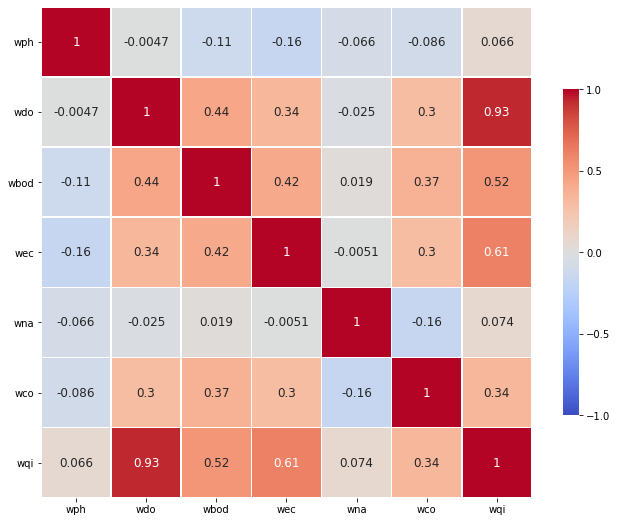

In [22]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [23]:
#calculation overall wqi for each year
ag=df1.groupby('station')['wqi'].mean()

In [24]:
ag.head()

station
17    70.403605
18    97.339342
20    95.399687
21    81.971003
42    98.800940
Name: wqi, dtype: float64

In [25]:
data=ag.reset_index(level=0,inplace=False)
data

,station,wqi
0,17,70.403605
1,18,97.339342
2,20,95.399687
3,21,81.971003
4,42,98.800940
...,...,...
314,3465,99.540230
315,3466,97.385057
316,3468,98.965517
317,3471,99.597701


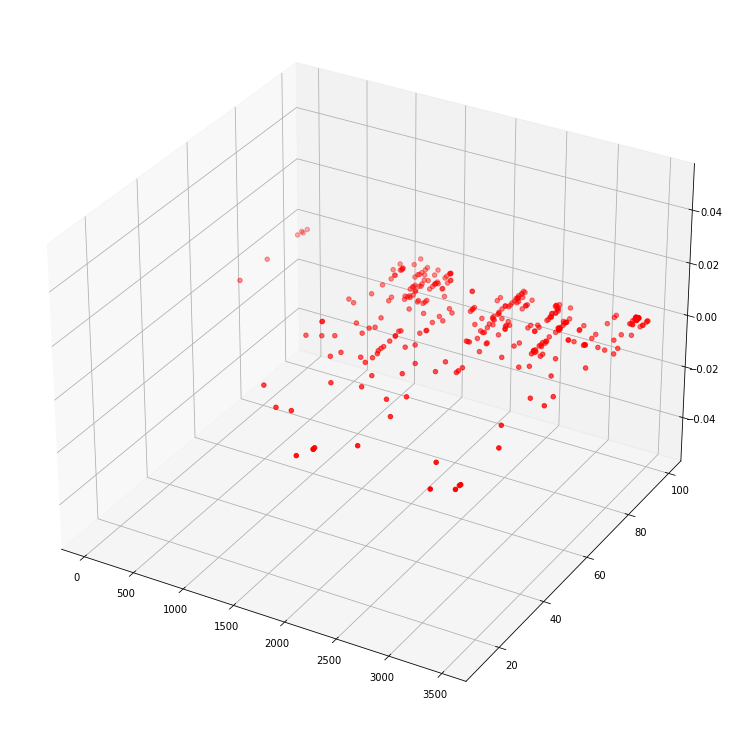

,station,wqi
0,17,70.403605
1,18,97.339342
2,20,95.399687
3,21,81.971003
4,42,98.800940
...,...,...
314,3465,99.540230
315,3466,97.385057
316,3468,98.965517
317,3471,99.597701


In [26]:
#visualizing the filttered data

station=data['station'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(station,AQI, color='red')
plt.show()
data

In [27]:
data = data[np.isfinite(data['wqi'])]
data.head()

,station,wqi
0,17,70.403605
1,18,97.339342
2,20,95.399687
3,21,81.971003
4,42,98.800940


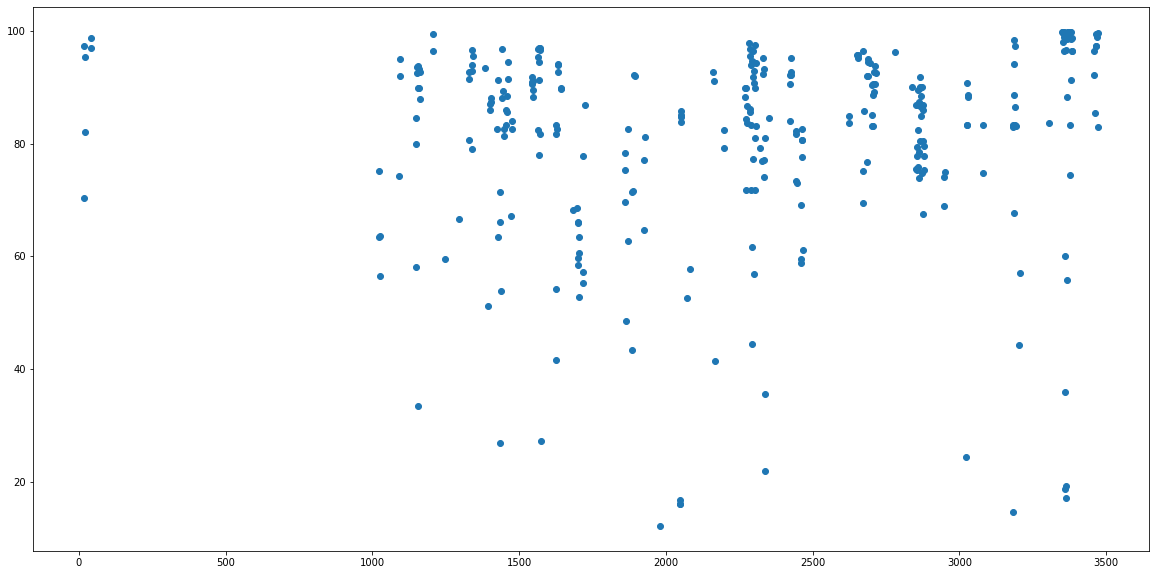

In [28]:
#scatter plot of data points
cols =['station']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

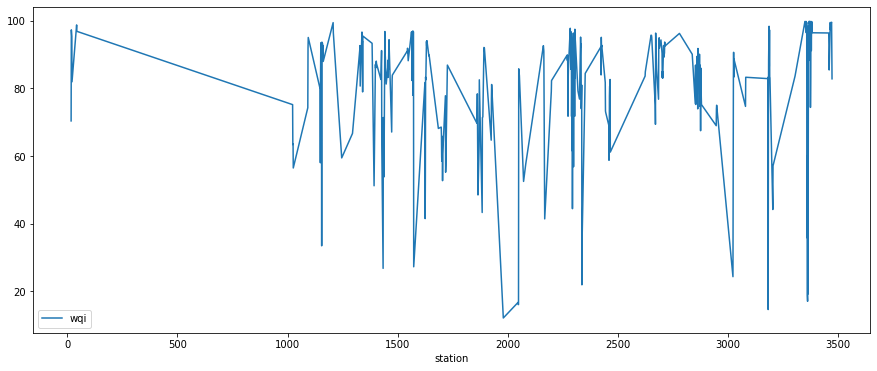

In [29]:
import matplotlib.pyplot as plt
data=data.set_index('station')
data.plot(figsize=(15,6))
plt.show()

In [30]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,station,wqi
0,17,70.403605
1,18,97.339342
2,20,95.399687
3,21,81.971003
4,42,98.800940
...,...,...
314,3465,99.540230
315,3466,97.385057
316,3468,98.965517
317,3471,99.597701


In [31]:
#using linear regression to predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [32]:
cols =['station']
y = data['wqi']
x=data[cols]

In [33]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
a=reg.predict(x_test)
a

array([82.552975  , 80.6404298 , 80.45354183, 79.37587938, 79.40382524,
       78.68945905, 79.68852375, 81.37051555, 79.168032  , 82.71541034,
       78.68072596, 78.67897935, 78.46065227, 79.18025831, 80.90766215,
       82.23334416, 82.24557047, 79.51386209, 80.75745312, 81.67966669,
       82.24207724, 82.5320156 , 79.40731847, 76.70530257, 78.58466205,
       79.16104553, 81.39322156, 79.6413651 , 82.55646823, 80.70156139,
       82.72414342, 82.52852236, 81.63076142, 82.56869455, 79.36889291,
       80.7557065 , 79.01432974, 79.63961848, 79.01258312, 79.5260884 ,
       79.24662975, 78.70343198, 81.66394714, 79.2518696 , 79.54180795,
       82.53900206, 79.5156087 , 78.58291543, 82.23858401, 82.05518926,
       79.61691247, 82.71366372, 81.67093361, 81.70237271, 81.3652757 ,
       79.64660495, 80.6928283 , 79.6728042 , 81.65521406, 81.69014639,
       82.24033062, 79.97846211, 79.1785117 , 81.69887947])

In [36]:
y_test

291    98.577586
134    88.288177
129    91.089901
68     89.596395
70     96.739812
         ...    
241    86.573276
267    98.405172
113    92.131226
46     26.767241
246    86.034483
Name: wqi, Length: 64, dtype: float64

In [37]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:325.40


In [38]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 

In [39]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.00000000e+00, -2.88728318e+00],
       [ 1.00000000e+00, -2.88600289e+00],
       [ 1.00000000e+00, -2.88344230e+00],
       [ 1.00000000e+00, -2.88216201e+00],
       [ 1.00000000e+00, -2.85527584e+00],
       [ 1.00000000e+00, -2.85399555e+00],
       [ 1.00000000e+00, -1.59930765e+00],
       [ 1.00000000e+00, -1.59802736e+00],
       [ 1.00000000e+00, -1.59674707e+00],
       [ 1.00000000e+00, -1.59546677e+00],
       [ 1.00000000e+00, -1.51096738e+00],
       [ 1.00000000e+00, -1.50968709e+00],
       [ 1.00000000e+00, -1.50840680e+00],
       [ 1.00000000e+00, -1.43927093e+00],
       [ 1.00000000e+00, -1.43799064e+00],
       [ 1.00000000e+00, -1.43671035e+00],
       [ 1.00000000e+00, -1.43543005e+00],
       [ 1.00000000e+00, -1.43414976e+00],
       [ 1.00000000e+00, -1.43158917e+00],
       [ 1.00000000e+00, -1.43030888e+00],
       [ 1.00000000e+00, -1.42902858e+00],
       [ 1.00000000e+00, -1.42518770e+00],
       [ 1.00000000e+00, -1.42390741e+00],
       [ 1.

In [40]:
alpha = 0.01 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 80.84, 1.61


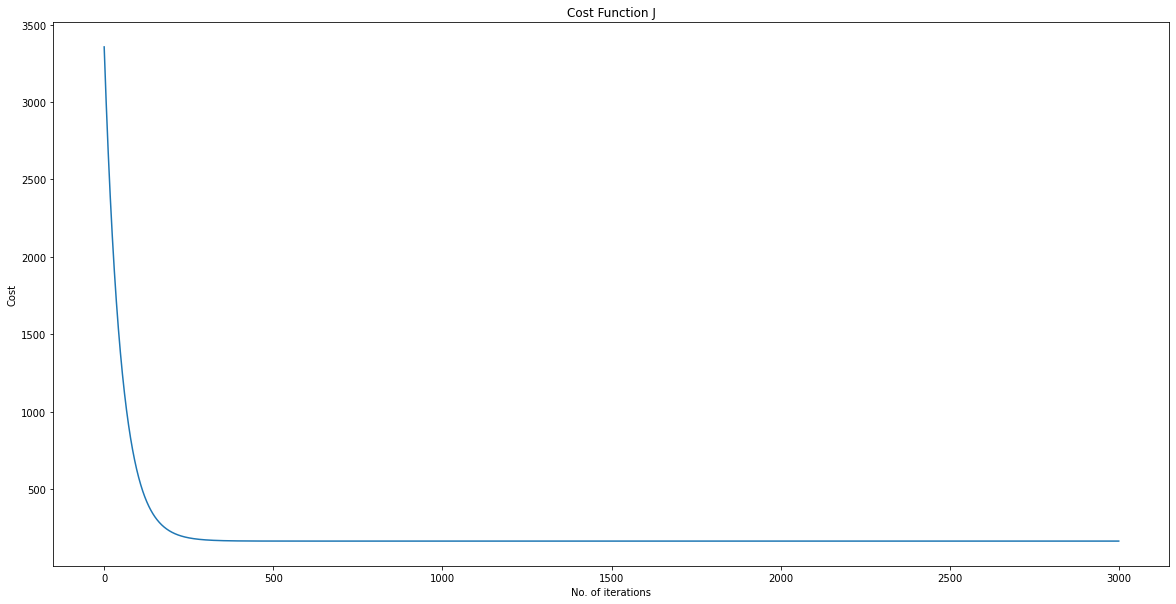

In [41]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [42]:
import numpy as np
newB=[80.85, 1.59]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)
dt.tail()

,station,wqi,Actual,Predicted
314,3465,99.540230,99.540230,83.278200
315,3466,97.385057,97.385057,83.280236
316,3468,98.965517,98.965517,83.284307
317,3471,99.597701,99.597701,83.290414
318,3473,82.859195,82.859195,83.294485


In [43]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

18.171560246284127


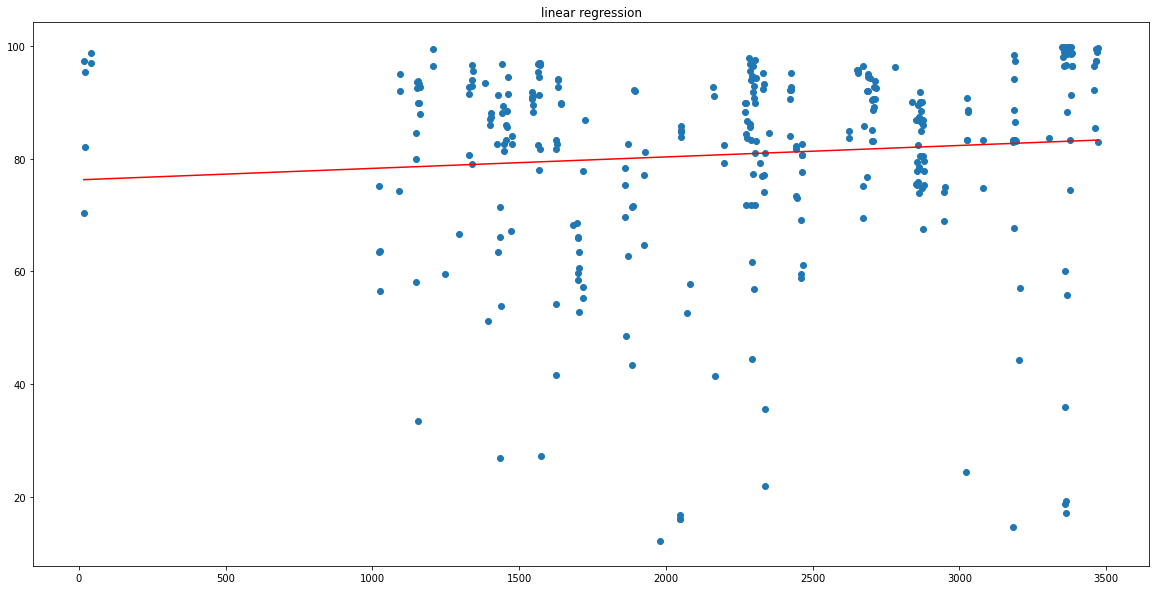

In [44]:
x_axis=dt.station
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()

In [45]:
df1['Excellent']=df1.wqi.apply(lambda x: (1 if (100>=x>=80)  
                                              else 0))
df1['Needs attention']=df1.wqi.apply(lambda x: (1 if (79>=x>=50)  
                                              else 0))
df1['Critical']=df1.wqi.apply(lambda x: (1 if (50>=x>=0)  
                                              else 0))
df1

,station,location,state,do,ph,co,bod,na,tc,year,...,wph,wdo,wbod,wec,wna,wco,wqi,Excellent,Needs attention,Critical
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200000,401307.505938,2014,...,100,80,100,60,100,0,79.741379,0,0,0
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100000,5330.000000,2014,...,80,100,100,60,100,40,91.293103,1,0,0
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500000,8443.000000,2014,...,80,80,80,100,100,40,84.181034,1,0,0
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400000,5500.000000,2014,...,100,80,100,80,100,40,83.318966,1,0,0
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100000,4049.000000,2014,...,100,80,100,80,100,40,83.318966,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.7,0.518000,202.000000,2003,...,100,100,100,0,100,60,83.491379,1,0,0
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.6,0.155000,315.000000,2003,...,0,100,100,0,100,60,74.870690,0,1,0
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.2,1.622091,570.000000,2003,...,0,100,100,80,0,40,81.163793,1,0,0
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.3,1.622091,562.000000,2003,...,40,100,100,80,0,40,84.612069,1,0,0


In [46]:
df1['Y']=df1.wqi.apply(lambda x: ('Excellent' if (100>=x>=80) 
                                  else('Needs improvement' if (79>=x>=50)
                                              else 'Critical')))
df1

,station,location,state,do,ph,co,bod,na,tc,year,...,wdo,wbod,wec,wna,wco,wqi,Excellent,Needs attention,Critical,Y
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200000,401307.505938,2014,...,80,100,60,100,0,79.741379,0,0,0,Critical
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100000,5330.000000,2014,...,100,100,60,100,40,91.293103,1,0,0,Excellent
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500000,8443.000000,2014,...,80,80,100,100,40,84.181034,1,0,0,Excellent
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400000,5500.000000,2014,...,80,100,80,100,40,83.318966,1,0,0,Excellent
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100000,4049.000000,2014,...,80,100,80,100,40,83.318966,1,0,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.7,0.518000,202.000000,2003,...,100,100,0,100,60,83.491379,1,0,0,Excellent
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.6,0.155000,315.000000,2003,...,100,100,0,100,60,74.870690,0,1,0,Needs improvement
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.2,1.622091,570.000000,2003,...,100,100,80,0,40,81.163793,1,0,0,Excellent
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.3,1.622091,562.000000,2003,...,100,100,80,0,40,84.612069,1,0,0,Excellent


In [47]:
import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [48]:
fp = r'C:\Sudhir\DP\DP 3\Women-Harrasment-in-India-master\Igismap\Indian_States.shp'
map_df = gpd.read_file(fp)
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


<AxesSubplot:>

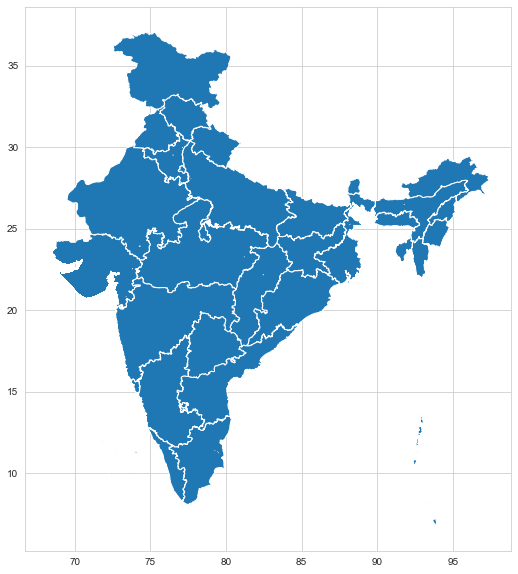

In [49]:
map_df.plot()

In [50]:
df1.groupby(state)
df1

,station,location,state,do,ph,co,bod,na,tc,year,...,wdo,wbod,wec,wna,wco,wqi,Excellent,Needs attention,Critical,Y
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200000,401307.505938,2014,...,80,100,60,100,0,79.741379,0,0,0,Critical
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100000,5330.000000,2014,...,100,100,60,100,40,91.293103,1,0,0,Excellent
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500000,8443.000000,2014,...,80,80,100,100,40,84.181034,1,0,0,Excellent
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400000,5500.000000,2014,...,80,100,80,100,40,83.318966,1,0,0,Excellent
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100000,4049.000000,2014,...,80,100,80,100,40,83.318966,1,0,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.7,0.518000,202.000000,2003,...,100,100,0,100,60,83.491379,1,0,0,Excellent
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.6,0.155000,315.000000,2003,...,100,100,0,100,60,74.870690,0,1,0,Needs improvement
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.2,1.622091,570.000000,2003,...,100,100,80,0,40,81.163793,1,0,0,Excellent
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.3,1.622091,562.000000,2003,...,100,100,80,0,40,84.612069,1,0,0,Excellent


In [51]:
import sys
for i in range (1,len(df1)+1):
    if df1['state'][i]== "ANDHRA PRADESH":
        df1['state'][i] = "Andhra Pradesh"
    elif df1['state'][i]== "DAMAN & DIU":
        df1['state'][i] = "Daman & Diu" 
    elif df1['state'][i]== "CHANDIGARH":
        df1['state'][i] = "Chandigarh" 
    elif df1['state'][i]== "GOA":
        df1['state'][i] = "Goa"
    elif df1['state'][i]== "GUJARAT":
        df1['state'][i] = "Gujarat"
    elif df1['state'][i]== "HARYANA":
        df1['state'][i] = "Haryana"
    elif df1['state'][i]== "HIMACHAL PRADESH":
        df1['state'][i] = "Himachal Pradesh"
    elif df1['state'][i]== "KARNATAKA":
        df1['state'][i] = "Karnataka"
    elif df1['state'][i]== "KERALA":
        df1['state'][i] = "Kerala"
    elif df1['state'][i]== "MADHYA PRADESH":
        df1['state'][i] = "Madhya Pradesh"
    elif df1['state'][i]== "MAHARASHTRA":
        df1['state'][i] = "Maharashtra"
    elif df1['state'][i]== "MANIPUR":
        df1['state'][i] = "Manipur"
    elif df1['state'][i]== "MEGHALAYA":
        df1['state'][i] = "Meghalaya"
    elif df1['state'][i]== "MIZORAM":
        df1['state'][i] = "Mizoram"
    elif df1['state'][i]== "ODISHA":
        df1['state'][i] = "Odisha"
    elif df1['state'][i]== "PONDICHERRY":
        df1['state'][i] = "Pondicherry"
    elif df1['state'][i]== "PUNJAB":
        df1['state'][i] = "Punjab"
    elif df1['state'][i]== "RAJASTHAN":
        df1['state'][i] = "Rajasthan"
    elif df1['state'][i]== "TAMIL NADU":
        df1['state'][i] = "Tamil Nadu"
    elif df1['state'][i]== "TRIPURA":
        df1['state'][i] = "Tripura"
    elif df1['state'][i]== "TAMILNADU":
        df1['state'][i] = "Tamil Nadu"
    elif df1['state'][i]== "ORISSA":
        df1['state'][i] = "Odisha"
    elif df1['state'][i]== "tripura":
        df1['state'][i] = "Tripura"
    elif df1['state'][i]== "DAMAN, DIU, DADRA NAGAR HAVELI":
        df1['state'][i] = "Daman & Diu"
df1

c:\sudhir\jupyter\envs\test_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\sudhir\jupyter\envs\test_env\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\sudhir\jupyter\envs\test_env\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\sudhir\jupyter\envs\te

,station,location,state,do,ph,co,bod,na,tc,year,...,wdo,wbod,wec,wna,wco,wqi,Excellent,Needs attention,Critical,Y
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,Goa,5.7,7.2,189.0,2.0,0.200000,401307.505938,2014,...,80,100,60,100,0,79.741379,0,0,0,Critical
2,1475,ZUARI AT PANCHAWADI,Goa,6.3,6.9,179.0,1.7,0.100000,5330.000000,2014,...,100,100,60,100,40,91.293103,1,0,0,Excellent
3,3181,RIVER ZUARI AT BORIM BRIDGE,Goa,5.8,6.9,64.0,3.8,0.500000,8443.000000,2014,...,80,80,100,100,40,84.181034,1,0,0,Excellent
4,3182,RIVER ZUARI AT MARCAIM JETTY,Goa,5.8,7.3,83.0,1.9,0.400000,5500.000000,2014,...,80,100,80,100,40,83.318966,1,0,0,Excellent
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",Goa,5.5,7.4,81.0,1.5,0.100000,4049.000000,2014,...,80,100,80,100,40,83.318966,1,0,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",Tamil Nadu,7.9,7.2,738.0,2.7,0.518000,202.000000,2003,...,100,100,0,100,60,83.491379,1,0,0,Excellent
1981,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",Tamil Nadu,7.5,6.3,585.0,2.6,0.155000,315.000000,2003,...,100,100,0,100,60,74.870690,0,1,0,Needs improvement
1982,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",Tripura,7.6,6.2,98.0,1.2,1.622091,570.000000,2003,...,100,100,80,0,40,81.163793,1,0,0,Excellent
1983,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",Tripura,7.7,6.5,91.0,1.3,1.622091,562.000000,2003,...,100,100,80,0,40,84.612069,1,0,0,Excellent


In [52]:
state_values = df1[['state', 'wqi', 'year']]
state_values.sort_values('year')
state_values.head()

,state,wqi,year
1,Goa,79.741379,2014
2,Goa,91.293103,2014
3,Goa,84.181034,2014
4,Goa,83.318966,2014
5,Goa,83.318966,2014


In [53]:
state_values.reset_index(drop = True)
state_values.tail()

,state,wqi,year
1980,Tamil Nadu,83.491379,2003
1981,Tamil Nadu,74.870690,2003
1982,Tripura,81.163793,2003
1983,Tripura,84.612069,2003
1984,Tripura,81.163793,2003


In [54]:
TN = pd.DataFrame(state_values.loc[state_values['state'] == 'Tamil Nadu'])

In [55]:
Goa = pd.DataFrame(state_values.loc[state_values['state'] == 'Goa'])

In [56]:
Kerala = pd.DataFrame(state_values.loc[state_values['state'] == 'Kerala'])

In [57]:
tnavg = TN.groupby('year').wqi.mean()
tnavg

year
2003    89.892241
2005    90.457974
2006    82.920259
2007    89.908405
2008    88.750000
2009    84.595905
2010    90.495690
2011    89.612069
2012    85.387931
2013    83.870074
2014    83.485222
Name: wqi, dtype: float64

<AxesSubplot:title={'center':'TN WQI from 2003-2014'}, xlabel='year', ylabel='wqi'>

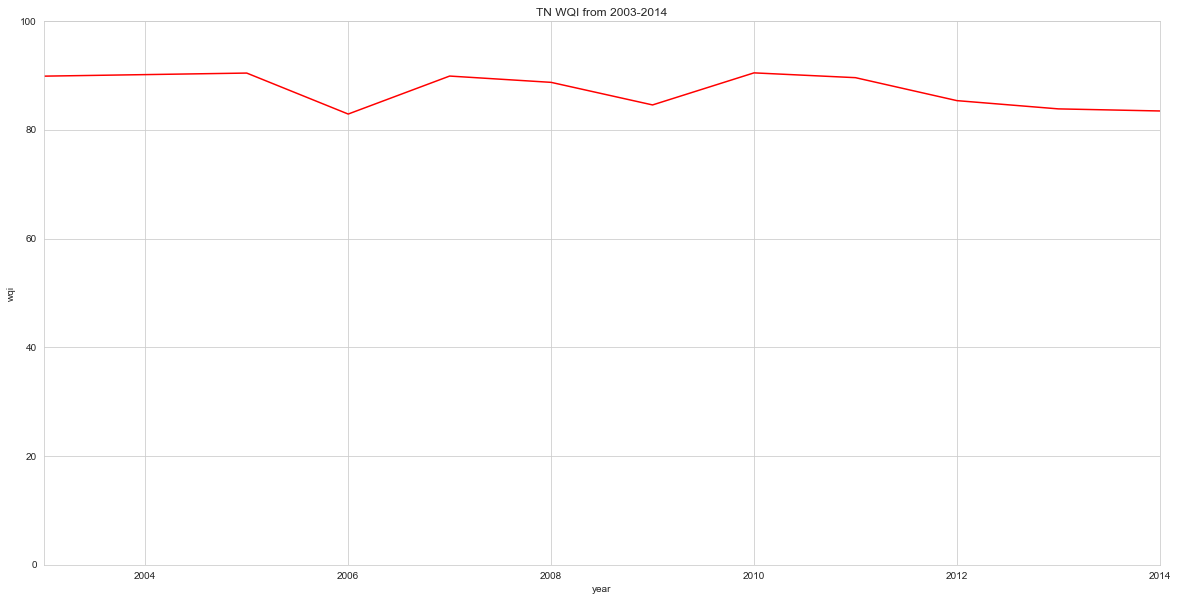

In [58]:
tnavg.plot.line(x='wqi', y='year', color='red', xlabel = 'year', ylabel = 'wqi', title='TN WQI from 2003-2014', ylim=(0,100), xlim=(2003,2014))

In [59]:
goaavg = Goa.groupby('year').wqi.mean()
goaavg

year
2003    86.819923
2004    72.931034
2005    83.676724
2006    86.866379
2007    91.301724
2008    96.112853
2009    76.103448
2011    87.218560
2012    85.889778
2013    85.894397
2014    83.599138
Name: wqi, dtype: float64

<AxesSubplot:title={'center':'Goa WQI from 2003-2014'}, xlabel='year', ylabel='wqi'>

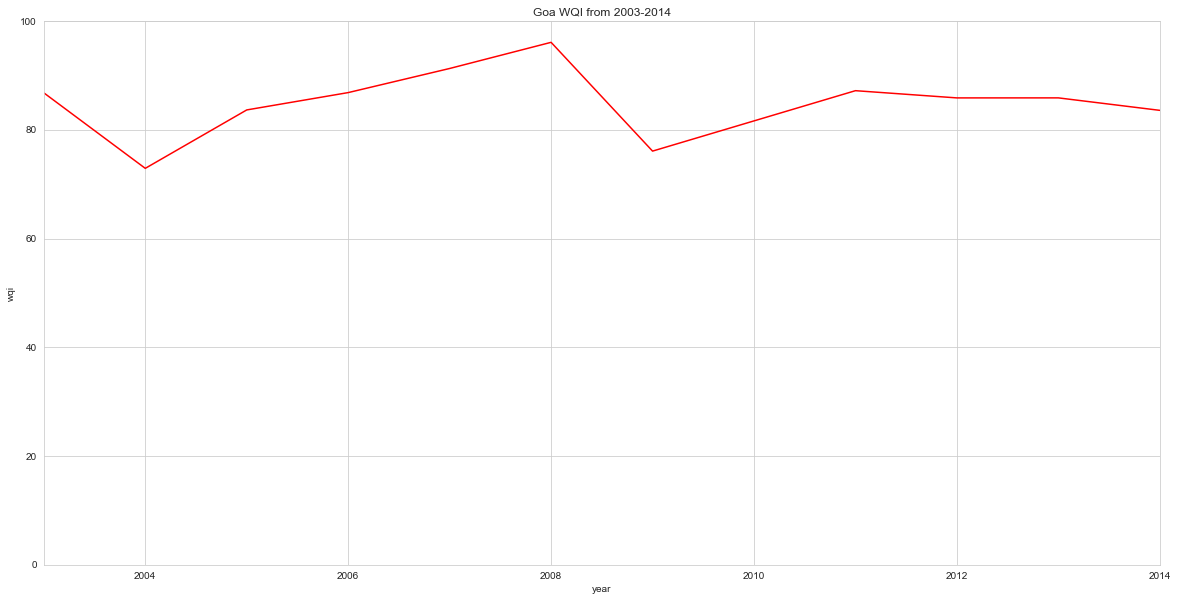

In [60]:
goaavg.plot.line(x='wqi', y='year', color='red', xlabel = 'year', ylabel = 'wqi', title='Goa WQI from 2003-2014', ylim=(0,100), xlim=(2003,2014))

In [61]:
klavg = Kerala.groupby('year').wqi.mean()
klavg

year
2003    90.863608
2005    87.574316
2006    83.853140
2007    84.034791
2008    85.057920
2009    85.786889
2010    85.484226
2011    85.343437
2012    85.084993
2013    86.070908
2014    84.871297
Name: wqi, dtype: float64

<AxesSubplot:title={'center':'Kerala WQI from 2003-2014'}, xlabel='year', ylabel='wqi'>

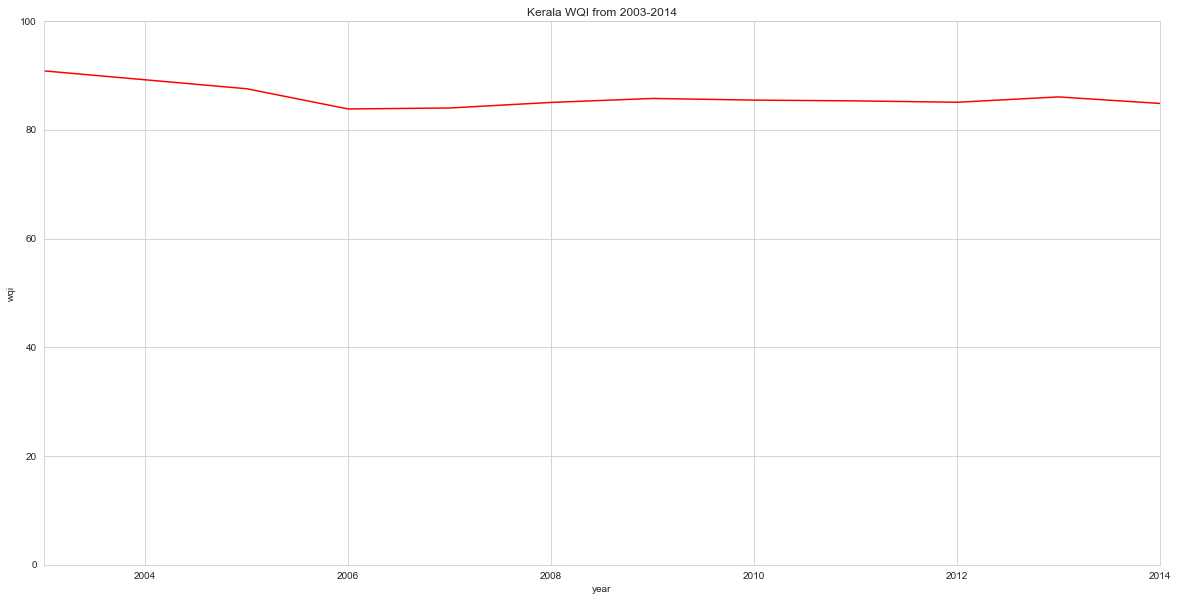

In [62]:
klavg.plot.line(x='wqi', y='year', color='red', xlabel = 'year', ylabel = 'wqi', title='Kerala WQI from 2003-2014', ylim=(0,100), xlim=(2003,2014))

In [63]:
#State wise WQI
state_wqi_values = pd.DataFrame(state_values.groupby('state')["wqi"].mean())
state_wqi_values

,wqi
state,
Andhra Pradesh,79.784483
Chandigarh,32.877155
Daman & Diu,70.565134
Goa,85.953597
Gujarat,63.657058
Haryana,59.246957
Himachal Pradesh,78.429803
Karnataka,93.581897
Kerala,85.651707


In [64]:
mp=state_wqi_values.reset_index(level=0,inplace=False)
mp1=mp.round(2)
mp1.head()

,state,wqi
0,Andhra Pradesh,79.78
1,Chandigarh,32.88
2,Daman & Diu,70.57
3,Goa,85.95
4,Gujarat,63.66


In [65]:
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [66]:
merged = map_df.set_index('st_nm').join(mp1.set_index('state'))
merged

,geometry,wqi
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",NaN
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",NaN
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",32.88
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",NaN
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",NaN
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",70.57
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",85.95


Text(90, 23, '87.79')

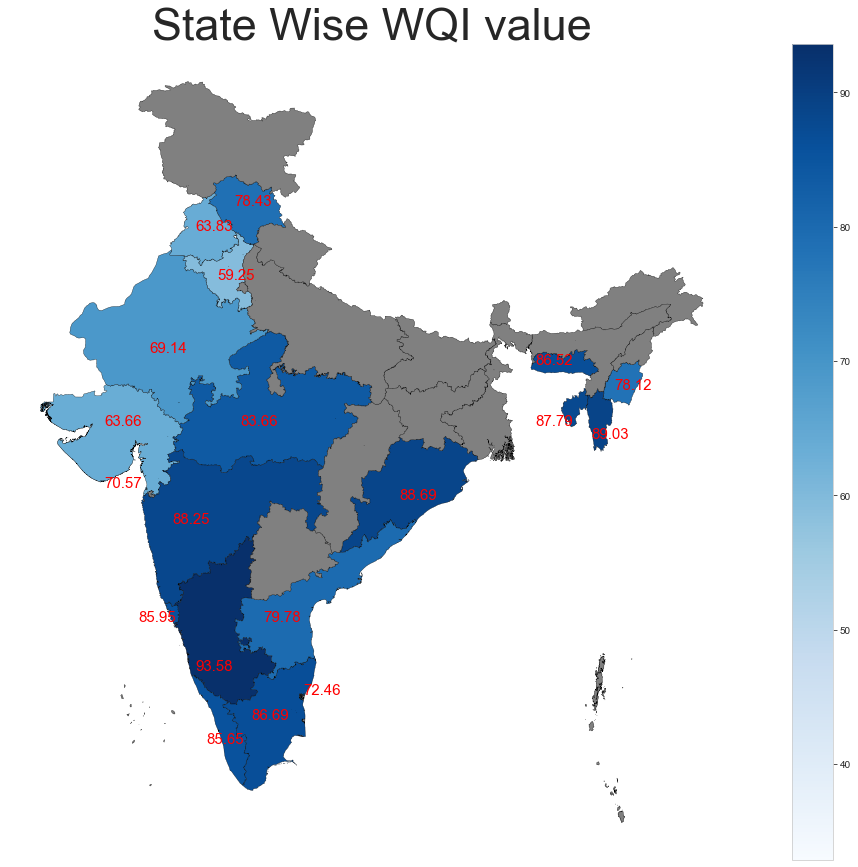

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(20,15))
ax.axis('off')

ax=merged.plot(column='wqi', cmap='Blues', linewidth=0.3, ax=ax, edgecolor='black', legend=True, missing_kwds={"color": "grey","edgecolor": "black"})
ax.set_title('State Wise WQI value', fontdict= {'fontsize':45, 'fontweight':3})

#Andhra Pradesh 
ax.text(78,15, mp1.wqi[0], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Daman & Diu 
ax.text(71,20.5, mp1.wqi[2], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Goa 
ax.text(72.5,15, mp1.wqi[3], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Gujarat 
ax.text(71,23, mp1.wqi[4], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Haryana 
ax.text(76,29, mp1.wqi[5], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Himachal Pradesh  
ax.text(76.75,32, mp1.wqi[6], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Karnataka  
ax.text(75,13, mp1.wqi[7], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Kerala  
ax.text(75.5,10, mp1.wqi[8], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Madhya Pradesh  
ax.text(77,23, mp1.wqi[9], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Maharashtra  
ax.text(74,19, mp1.wqi[10], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Manipur
ax.text(93.5,24.5, mp1.wqi[11], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Meghalaya  
ax.text(90,25.5, mp1.wqi[12], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Mizoram  
ax.text(92.5,22.5, mp1.wqi[13], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Odisha 
ax.text(84,20, mp1.wqi[15], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Pondicherry  
ax.text(79.8,12, mp1.wqi[16], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Punjab  
ax.text(75,31, mp1.wqi[17], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Rajasthan 
ax.text(73,26, mp1.wqi[18], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Tamil Nadu
ax.text(77.5,11, mp1.wqi[19], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Tripura  
ax.text(90, 23, mp1.wqi[20], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))